# Librairies 

In [2]:
import sys
sys.path.append('C:/Users/Ayoub/Desktop')
from Outils import *
from Outils_plot import *
from metrics import *
import warnings
warnings.filterwarnings('ignore')


# Données

In [3]:
match_id2match, match_id2events, player_id2player, competition_id2competition, team_id2team = load_public_dataset(tournament='Spain')


In [4]:
[competition['name'] for competition in competition_id2competition.values()]

['Italian first division',
 'English first division',
 'Spanish first division',
 'French first division',
 'German first division',
 'European Championship',
 'World Cup']

# Structure des données 


## Joueurs

In [5]:
a_player = list(player_id2player.keys())[2920]
player_id2player[a_player]

{'passportArea': {'name': 'Gabon',
  'id': 266,
  'alpha3code': 'GAB',
  'alpha2code': 'GA'},
 'weight': 80,
 'firstName': 'Pierre-Emerick',
 'middleName': '',
 'lastName': 'Aubameyang',
 'currentTeamId': 1609,
 'birthDate': '1989-06-18',
 'height': 187,
 'role': {'code2': 'FW', 'code3': 'FWD', 'name': 'Forward'},
 'birthArea': {'name': 'France',
  'id': 250,
  'alpha3code': 'FRA',
  'alpha2code': 'FR'},
 'wyId': 25867,
 'foot': 'right',
 'shortName': 'P. Aubameyang',
 'currentNationalTeamId': 19062}

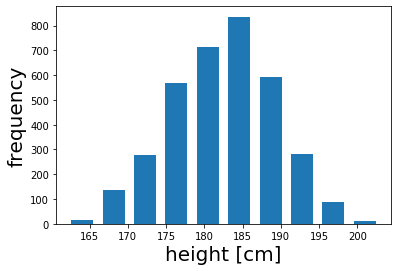

In [6]:
heights = [player['height'] for player in player_id2player.values() if player['height'] > 0]
plt.hist(heights, rwidth=0.7)
plt.xlabel('height [cm]', fontsize=20)
plt.ylabel('frequency', fontsize=20)
plt.show()


## Compétitions

In [7]:
first_competition = list(competition_id2competition.keys())[1]
competition_id2competition[first_competition]

{'name': 'English first division',
 'wyId': 364,
 'format': 'Domestic league',
 'area': {'name': 'England', 'id': '0', 'alpha3code': 'XEN', 'alpha2code': ''},
 'type': 'club'}

## Matches

In [8]:
a_match = list(match_id2match.keys())[20]
match_id2match[a_match]["label"]

'Sevilla - Real Madrid, 3 - 2'

In [53]:
c=0
for match_id, match in match_id2match.items():
    c+=1
    if c==381:
        break
    print(match['label'])
    print(match_id)
    
sum_goals

Barcelona - Real Sociedad, 1 - 0
2565922
Atl\u00e9tico Madrid - Eibar, 2 - 2
2565925
Athletic Club - Espanyol, 0 - 1
2565919
Valencia - Deportivo La Coru\u00f1a, 2 - 1
2565924
Villarreal - Real Madrid, 2 - 2
2565927
Sevilla - Deportivo Alav\u00e9s, 1 - 0
2565920
M\u00e1laga - Getafe, 0 - 1
2565921
Las Palmas - Girona, 1 - 2
2565923
Legan\u00e9s - Real Betis, 3 - 2
2565926
Celta de Vigo - Levante, 4 - 2
2565918
Levante - Barcelona, 5 - 4
2565917
Espanyol - M\u00e1laga, 4 - 1
2565910
Real Madrid - Celta de Vigo, 6 - 0
2565912
Girona - Valencia, 0 - 1
2565908
Deportivo Alav\u00e9s - Athletic Club, 3 - 1
2565909
Deportivo La Coru\u00f1a - Villarreal, 2 - 4
2565911
Getafe - Atl\u00e9tico Madrid, 0 - 1
2565913
Real Betis - Sevilla, 2 - 2
2565914
Eibar - Las Palmas, 1 - 0
2565915
Real Sociedad - Legan\u00e9s, 3 - 2
2565916
Sevilla - Real Madrid, 3 - 2
2565882
Barcelona - Villarreal, 5 - 1
2565884
Legan\u00e9s - Levante, 0 - 3
2565900
Barcelona - Real Madrid, 2 - 2
2565907
Las Palmas - Getafe,

1024

### Nombre de but dans la saison de liga

In [9]:
sum_goals = 0
c=0
for match_id, match in match_id2match.items():
    c+=1
    if c==381:
        break
    goals = match['label'].split(', ')[1].split(' - ')
    goals = [int(goal) for goal in goals]
    sum_goals += sum(goals)
sum_goals

1024

### La moyenne des buts par match

In [10]:
goals_in_match = []
c=0
for match_id, match in match_id2match.items():
    c+=1
    if c==381:
        break
    goals = match['label'].split(', ')[1].split(' - ')
    goals = [int(goal) for goal in goals]
    goals_in_match.append(sum(goals))
round(np.mean(goals_in_match), 2)

2.69

## Evénements

In [11]:
match_id2events[a_match][20]

{'eventId': 8,
 'subEventName': 'Simple pass',
 'tags': [{'id': 1801}],
 'playerId': 3306,
 'positions': [{'y': 16, 'x': 29}, {'y': 66, 'x': 24}],
 'matchId': 2565882,
 'eventName': 'Pass',
 'teamId': 675,
 'matchPeriod': '1H',
 'eventSec': 37.838859,
 'subEventId': 85,
 'id': 250610330}

## Sous-événement 

In [12]:
event_types = []
for match_id, events in match_id2events.items():
    for event in events:
        event_types.append((event['eventName'], event['subEventName']))
set(event_types)

{('Duel', 'Air duel'),
 ('Duel', 'Ground attacking duel'),
 ('Duel', 'Ground defending duel'),
 ('Duel', 'Ground loose ball duel'),
 ('Foul', 'Foul'),
 ('Foul', 'Hand foul'),
 ('Foul', 'Late card foul'),
 ('Foul', 'Out of game foul'),
 ('Foul', 'Protest'),
 ('Foul', 'Simulation'),
 ('Foul', 'Time lost foul'),
 ('Foul', 'Violent Foul'),
 ('Free Kick', 'Corner'),
 ('Free Kick', 'Free Kick'),
 ('Free Kick', 'Free kick cross'),
 ('Free Kick', 'Free kick shot'),
 ('Free Kick', 'Goal kick'),
 ('Free Kick', 'Penalty'),
 ('Free Kick', 'Throw in'),
 ('Goalkeeper leaving line', 'Goalkeeper leaving line'),
 ('Interruption', 'Ball out of the field'),
 ('Interruption', 'Whistle'),
 ('Offside', ''),
 ('Others on the ball', 'Acceleration'),
 ('Others on the ball', 'Clearance'),
 ('Others on the ball', 'Touch'),
 ('Pass', 'Cross'),
 ('Pass', 'Hand pass'),
 ('Pass', 'Head pass'),
 ('Pass', 'High pass'),
 ('Pass', 'Launch'),
 ('Pass', 'Simple pass'),
 ('Pass', 'Smart pass'),
 ('Save attempt', 'Reflexes'

# Statistiques

## Fréquences événements par type

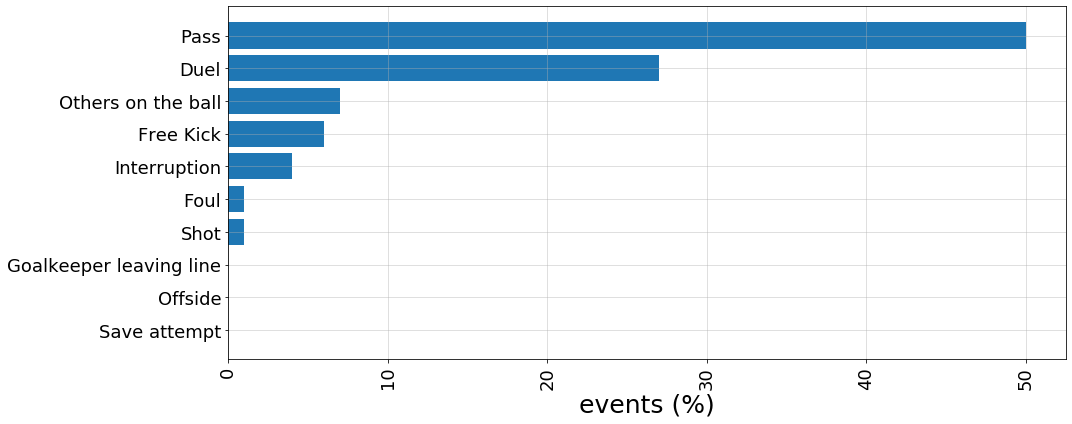

In [13]:
events_list = []
for match_id, events in match_id2events.items():
    for event in events:
        events_list.append(event['eventName'])

count = Counter(events_list)
# express frequency in percentage
counter = {}
for i, n_events in zip(count.keys(), count.values()):
    counter[i] = int(float(n_events)/len(events_list)*100)
sorted_d = np.array(sorted(counter.items(), key=operator.itemgetter(1), reverse=False))

#bar plot
fig, ax = plt.subplots(figsize=(15,6))
plt.barh(list(sorted_d[:,0]),[int(x) for x in list(sorted_d[:,1])])
plt.xticks(rotation=90);plt.xticks(fontsize=18)
plt.xlabel('events (%)', fontsize=25)
plt.yticks(fontsize=18)
plt.grid(alpha=0.5)
fig.tight_layout()
plt.show()

## Graphique des événements

Nous prenons un match et nous traçons tous les événements des deux équipes dans un terrain .

In [14]:

match_id = 2565907 # le match entre real madrid et Barcelone
match_events = match_id2events[match_id]
match_label = match_id2match[match_id]['label']
            
match_df = pd.DataFrame(match_events)
match_df.tail()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
1788,3,Corner,"[{'id': 801}, {'id': 1801}]",4498,"[{'y': 100, 'x': 100}, {'y': 51, 'x': 88}]",2565907,Free Kick,675,2H,2982.539784,30,249646064
1789,1,Ground loose ball duel,"[{'id': 701}, {'id': 1802}]",3306,"[{'y': 51, 'x': 88}, {'y': 60, 'x': 88}]",2565907,Duel,675,2H,2983.141976,13,249646065
1790,1,Ground loose ball duel,"[{'id': 703}, {'id': 1801}]",3476,"[{'y': 49, 'x': 12}, {'y': 40, 'x': 12}]",2565907,Duel,676,2H,2983.907855,13,249646246
1791,2,Foul,[],3306,"[{'y': 60, 'x': 88}, {'y': 51, 'x': 88}]",2565907,Foul,675,2H,2984.949321,20,249646066
1792,3,Free Kick,[{'id': 1802}],0,"[{'y': 54, 'x': 13}, {'y': 0, 'x': 0}]",2565907,Free Kick,676,2H,2986.083335,31,249646247


In [15]:
match_df['x_start'] = [x[0]['x'] for x in match_df['positions']]
match_df['y_start'] = [x[0]['y'] for x in match_df['positions']]

Graphique

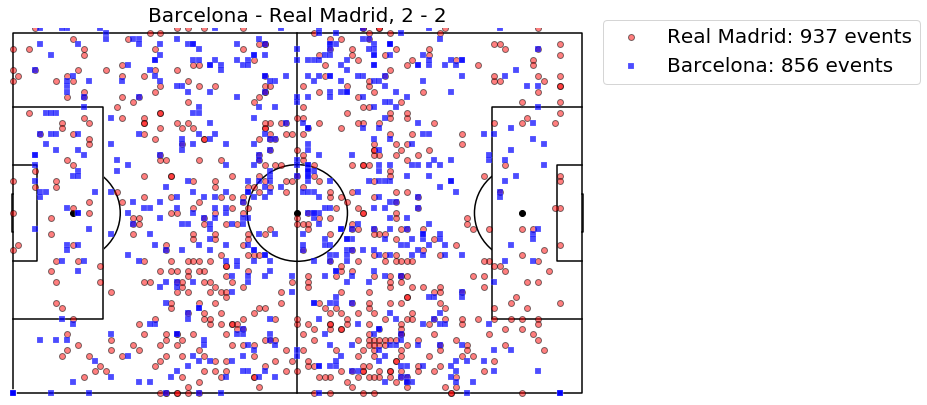

In [16]:

team_1, team_2 = np.unique(match_df['teamId'])
df_team_1 = match_df[match_df['teamId'] == team_1]
df_team_2 = match_df[match_df['teamId'] == team_2]

f = draw_pitch("white", "black", "h", "full")
plt.scatter(df_team_1['x_start'], df_team_1['y_start'], c='red', edgecolors="k", zorder=12, 
            alpha=0.5, label='%s: %s events' %(team_id2team[team_1]['name'], len(df_team_1)))
plt.scatter(df_team_2['x_start'], df_team_2['y_start'], marker='s', c='blue', edgecolors="w", linewidth=0.25, zorder=12, 
            alpha=0.7, label='%s: %s events' %(team_id2team[team_2]['name'], len(df_team_2)))
plt.legend(fontsize=20, bbox_to_anchor=(1.01, 1.05))
plt.title(match_label, fontsize=20)
plt.show()

In [17]:
def plot_events(match_id=2565907, team_id='both', event_name='all'):
    """
    Plot the events onthe position where they have been generated.
    
    Parameters
    ----------
    match_id : int, optional
        identifier of the match to plot
        
    team_id : str or int, optional
        the identifier of the team to plot. 
        If 'both', it indicates to plot both teams The default is 'both'.
        
    event_name : str, optional
        the type of the event to plot. If 'all', it plots all the events.
        The defauult is 'all'.
    """
    match_label = match_id2match[match_id]['label']
    match_events = match_id2events[match_id]
    selected_events = []
    for event in match_events:
        if team_id == 'both' or event['teamId'] == team_id:
            if event_name == 'all' or event['eventName'] == event_name:
                selected_events.append(event)
    
    match_df = pd.DataFrame(selected_events)
    match_df['x_start'] = [x[0]['x'] for x in match_df['positions']]
    match_df['y_start'] = [x[0]['y'] for x in match_df['positions']]
    
    if team_id == 'both':
        team_1, team_2 = np.unique(match_df['teamId'])
        df_team_1 = match_df[match_df['teamId'] == team_1]
        df_team_2 = match_df[match_df['teamId'] == team_2]
    else:
        df_team = match_df[match_df['teamId'] == team_id]
    
    f = draw_pitch("white", "black", "h", "full")
    if team_id == 'both':
        plt.scatter(df_team_1['x_start'], df_team_1['y_start'], c='red', edgecolors="k", zorder=12, 
            alpha=0.5, label='%s: %s %s' %(team_id2team[team_1]['name'], len(df_team_1), 'events' if event_name=='all' else event_name))
        plt.scatter(df_team_2['x_start'], df_team_2['y_start'], marker='s', c='blue', edgecolors="w", linewidth=0.25, zorder=12, 
                    alpha=0.7, label='%s: %s %s' %(team_id2team[team_2]['name'], len(df_team_2), 'events' if event_name=='all' else event_name))
        plt.legend(fontsize=20, bbox_to_anchor=(1.01, 1.05))
    else:
        plt.scatter(df_team['x_start'], df_team['y_start'], 
                    c='red', edgecolors="k", zorder=12, alpha=0.5,
                   label='%s: %s %s' %(team_id2team[team_id]['name'], len(df_team), 'events' if event_name=='all' else event_name))
    plt.title(match_label, fontsize=20)
    plt.legend(fontsize=20, bbox_to_anchor=(1.01, 1.05))
    plt.show()

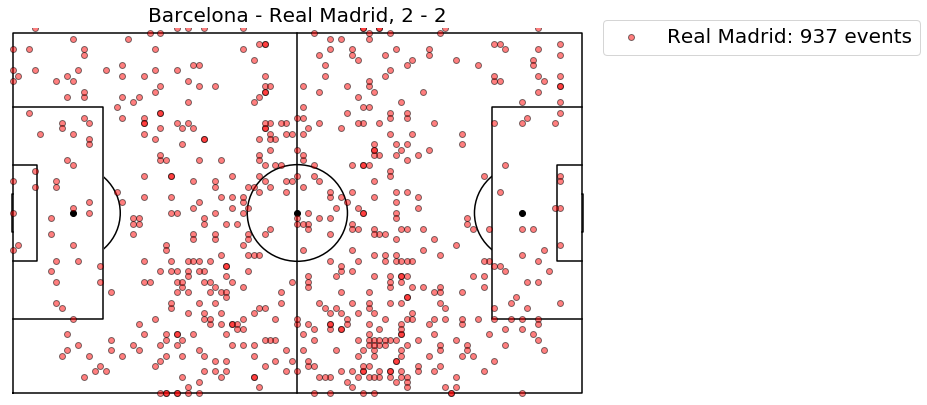

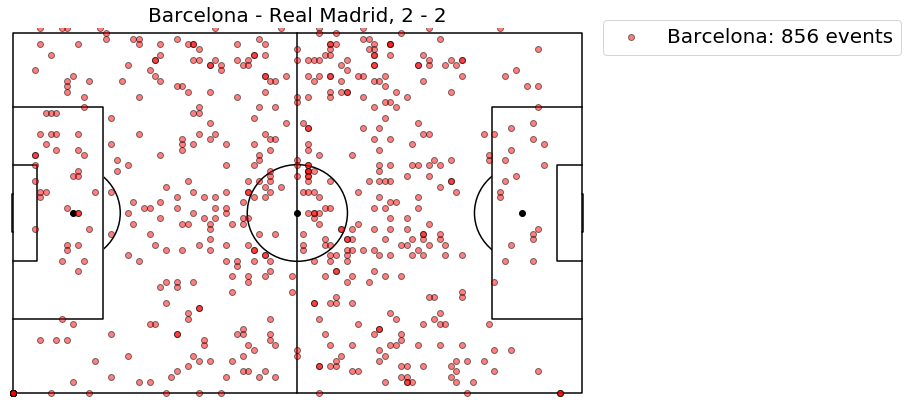

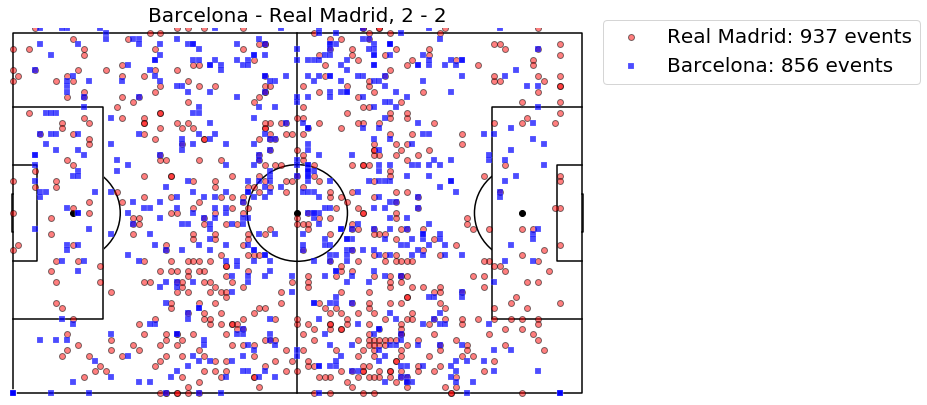

In [18]:
match_id, team1, team2 = 2565907, 675, 676
plot_events(team_id=team1)
plot_events(team_id=team2)
plot_events(team_id='both')

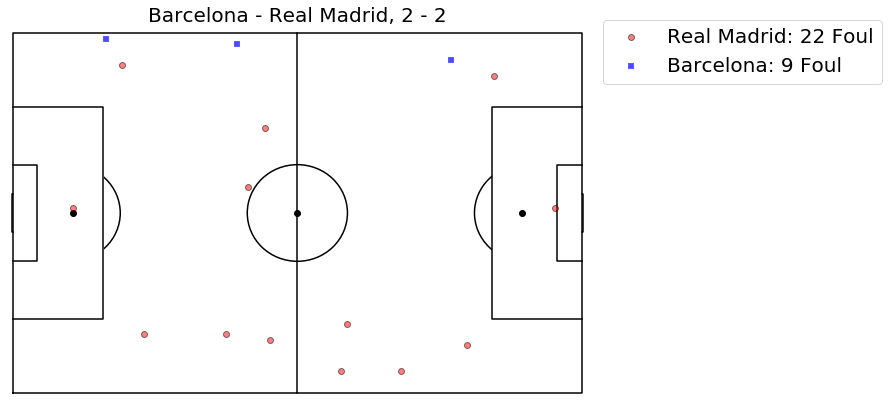

In [19]:
plot_events(team_id='both',event_name='Foul')

## Graphique intéractif

In [20]:
def visualize_events(match_id=2565907, player_id='all', team_id='both', event_name='all'):
    """
    Visualize all the events of a match on the soccer pitch.
    
    Parameters
    ----------
    match_id : int, optional
        identifier of the match to plot
        
    team_id : str or int, optional
        the identifier of the team to plot. 
        If 'both', it indicates to plot both teams The default is 'both'.
        
    event_name : str, optional
        the type of the event to plot. If 'all', it plots all the events.
        The defauult is 'all'.
    """
    
    match_events = []
    for event in match_id2events[match_id]:
        if team_id == 'both' or event['teamId'] == team_id:
            if event_name == 'all' or event['eventName'] == event_name:
                if player_id == 'all' or event['playerId'] == player_id:
                    match_events.append(event)
    
    match = match_id2match[match_id] 
    match_label = match['label']
    
    team1, team2 = match['teamsData'].keys()
    team_name1, team_name2 = team_id2team[int(team1)]['name'], team_id2team[int(team2)]['name']
    
    # Create and style traces
    trace1 = go.Scatter(
        x = [event['positions'][0]['x'] for event in match_events if str(event['teamId']) == team1],
        y = [event['positions'][0]['y'] for event in match_events if str(event['teamId']) == team1],
        text = ['%s by %s (%s)' %(event['eventName'], player_id2player[event['playerId']]['shortName'].encode('ascii', 'strict').decode('unicode-escape'), event['playerId']) for event in match_events if str(event['teamId']) == team1],
        mode = 'markers',
        name = team_name1,
        marker = dict(
            size = 8,
            color = 'red',
        )
    )

    trace2 = go.Scatter(
        x = [event['positions'][0]['x'] for event in match_events if str(event['teamId']) == team2],
        y = [event['positions'][0]['y'] for event in match_events if str(event['teamId']) == team2],
        text = ['%s by %s (%s)' %(event['eventName'], player_id2player[event['playerId']]['shortName'].encode('ascii', 'strict').decode('unicode-escape'), event['playerId']) for event in match_events if str(event['teamId']) == team2],
        mode = 'markers',
        name = team_name2,
        marker = dict(
            size = 8,
            color = 'blue',
            symbol='square'
        )
    )

    fig = dict(data=[trace1, trace2], layout=get_pitch_layout(match_label))
    fig['data'][0]['name'] = team_name1
    fig['data'][1]['name'] = team_name2
    iplot(fig)

# Positions de joueurs dans le terrain 

In [21]:
def plot_kde_events_on_field(sample_size=10000):
    """
    Generate density plots on the field for each event type
    
    Parameters
    ----------
    sample_size: int
        random sample of values to use (default: 10000). The code becomes slow is you increase this value
        significantly.
    """
    positions = []
    for match_events in match_id2events.values():
        for event in match_events:
            positions.append([event['eventName'], 
                              event['positions'][0]['x'], 
                              event['positions'][0]['y']])

    positions_df = pd.DataFrame(positions, columns=['eventName','x','y'])

    for event_type in EVENT_TYPES:
        pos_event_df = positions_df[positions_df['eventName'] == event_type]
        fig, ax = pitch()
        if len(pos_event_df) >= sample_size:
            x_y = pos_event_df[['x','y']].sample(sample_size).astype(float)
        else:
            x_y = pos_event_df[['x','y']].astype(float)
        
        sns.kdeplot(x_y['x'], x_y['y'], cmap = 'Greens', shade = True)
        
        plt.title(event_type, fontsize = 30)
        plt.xlim(-1,101)
        plt.ylim(-1,101)
        plt.axis('off')
        fig.tight_layout()
        plt.show()

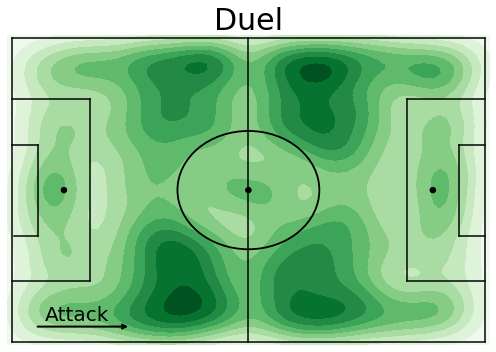

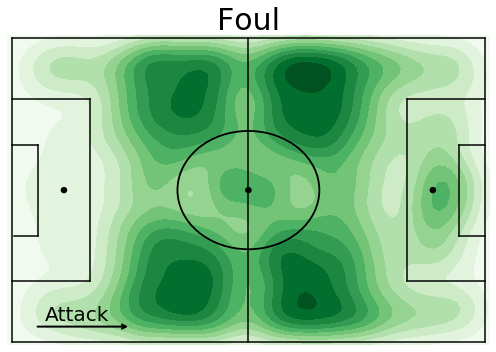

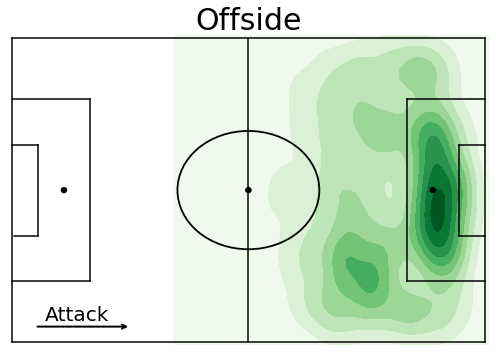

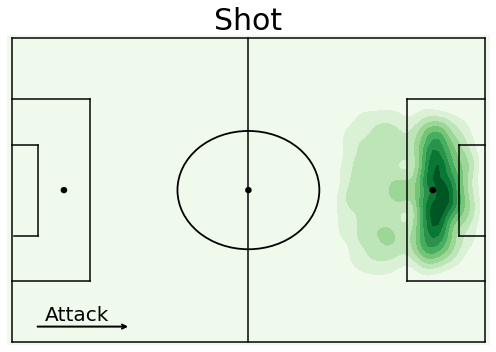

In [22]:
plot_kde_events_on_field(sample_size=10000)

# Les événements selon le temps

In [23]:
def in_match_evolution(event_name='Goal', event_tag=101):
    """
    Plot the in-match evolution of the number of events of a specific type.
    
    Parameters
    ----------
    event_name : str, optional
        the type of event to plot. The default is "Goal".
        
    event_tag : int, optional
        the type of tag to plot. The default is 101.
    """
    # slect specific event in accordance with event_tag
    events_time = []
    for match_id, match_events in match_id2events.items():
        for event in match_events:
            tags = event['tags']
            for tag in tags:
                if tag['id'] == event_tag:
                    events_time.append([event['matchId'], 
                                        event['matchPeriod'], 
                                        event['eventSec']])
                
    # let us convert it into a DataFrame
    event_df = pd.DataFrame(events_time, columns=['matchId','matchPeriod','eventSec'])
    
    # create figure
    fig, ax = plt.subplots(figsize=(8,6))
    
    start_bin_2h = 11
    
    # define plot characteristics for 1H e 2H
    for half, color_bar in zip(['1H','2H'],['blue','green']):
        
        # define DataFrame per half time
        df_half = event_df[event_df['matchPeriod'] == half].sort_values(['matchPeriod','eventSec'])
        
        # create bins every 5 minutes
        df_half['binned'] = df_half['eventSec'].pipe(lambda x: pd.to_timedelta(x, "s")).dt.floor("5min").astype("category").cat.codes
        
        # merge bins up to 45 minutes 
        df_half['binned'] = [9 if x>9 else x for x in df_half['binned']]
        
        # plot bin for second half
        if half == '2H':
            df_half['binned'] = [x+start_bin_2h for x in df_half['binned']]
            
        # barplot
        count = Counter(df_half.binned)
        barlist = plt.bar(count.keys(),count.values(),
                          label=half,color=color_bar)
        
    plt.legend(loc=2, fontsize=15, frameon=True, shadow=True)
    plt.xticks(list(range(0,23)),['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','>45','',
                                  '45-50','50-55','55-60','60-65','65-70','70-75','75-80','80-85','85-90','>90'],
              rotation=90, fontsize=18)
    plt.yticks(fontsize=18)
    max_count_value = np.max(list(count.values()))
    plt.text(9.65, max_count_value-(max_count_value/100*10), 'half time', rotation=90, 
             bbox=dict(facecolor='w',edgecolor='r'),
             verticalalignment='center', horizontalalignment='left', fontsize=15, 
             color='tomato')
    plt.vlines(10, 0, max_count_value+(max_count_value/100*10),colors='r',alpha=0.5)
    plt.ylim(0,max_count_value+(max_count_value/100*10))
    plt.xlabel('match time (min)', fontsize=25)
    plt.ylabel('%s (n)'%event_name, fontsize=25)
    plt.grid(alpha=0.3)
    fig.tight_layout()
    plt.show()

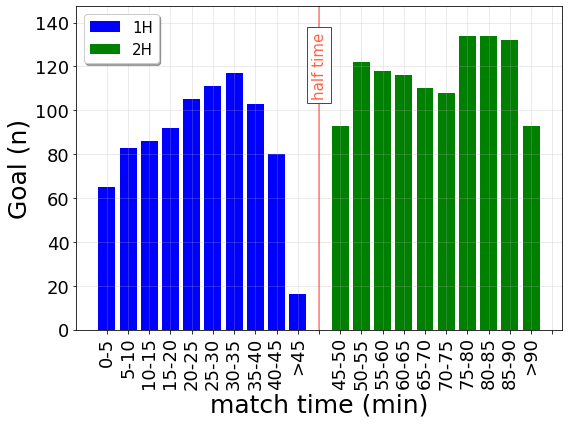

In [24]:
in_match_evolution(event_name='Goal', event_tag=101)

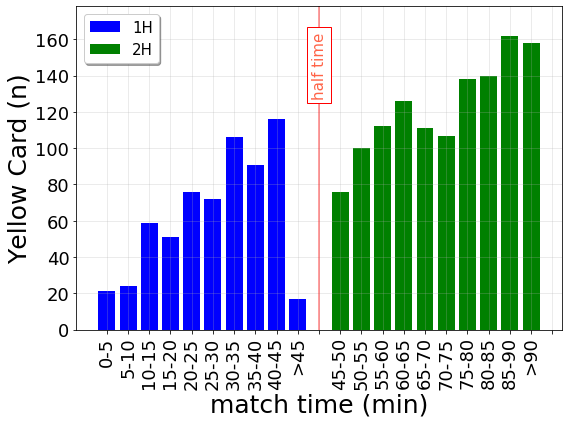

In [25]:
in_match_evolution(event_name='Yellow Card', event_tag=1702)

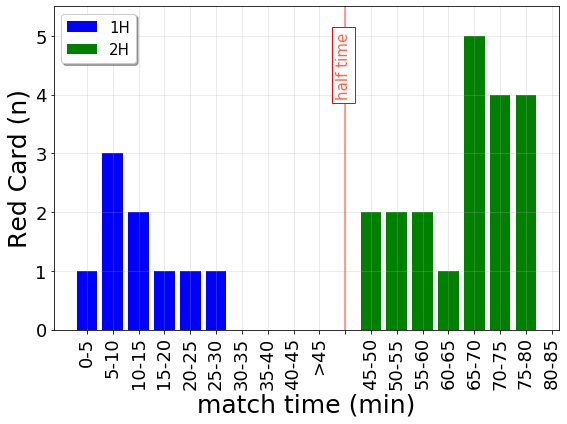

In [26]:
in_match_evolution(event_name='Red Card', event_tag=1701)

# Réseaux de passes

In [27]:
def passing_networks(match_id=2576105):
    """
    Construct the passing networks of the teams in the match.
    
    Parameters
    ----------
    match_id : int, optional
        identifier of the match to plot
        
    Returns
    -------
    tuple
        the two constructed networks, as networkx objects.
    """
    
    # take the names of the two teams of the match
    match_label = match_id2match[match_id]['label']
    team1_name = match_label.split('-')[0].split(' ')[0]
    team2_name = match_label.split('-')[1].split(' ')[1].split(',')[0]
    
    # take all the events of the match
    match_events = []
    for event in match_id2events[match_id]:
        if event['eventName'] == 'Pass':
            match_events.append(event)

    match_events_df = pd.DataFrame(match_events)
    first_half_max_duration = np.max(match_events_df[match_events_df['matchPeriod'] == '1H']['eventSec'])

    # sum 1H time end to all the time in 2H
    for event in match_events:
        if event['matchPeriod'] == '2H':
            event['eventSec'] += first_half_max_duration
    
    team2pass2weight = defaultdict(lambda: defaultdict(int))
    for event, next_event, next_next_event in zip(match_events, match_events[1:], match_events[2:]):
        try:
            if event['eventName'] == 'Pass' and ACCURATE_PASS in [tag['id'] for tag in event['tags']]:
                sender = player_id2player[event['playerId']]['shortName'].encode('ascii', 'strict').decode('unicode-escape')
                # case of duel
                if next_event['eventName'] == 'Duel':
                    # if the next event of from a playero of the same tema
                    if next_event['teamId'] == event['teamId']:
                        receiver = player_id2player[next_event['playerId']]['shortName'].encode('ascii', 'strict').decode('unicode-escape')
                        team2pass2weight[team_id2team[event['teamId']]['name']][(sender, receiver)] += 1
                    else:
                        receiver = player_id2player[next_next_event['playerId']]['shortName'].encode('ascii', 'strict').decode('unicode-escape')
                        team2pass2weight[team_id2team[event['teamId']]['name']][(sender, receiver)] += 1
                else:  # any other event 
                    if next_event['teamId'] == event['teamId']:
                        receiver = player_id2player[next_event['playerId']]['shortName'].encode('ascii', 'strict').decode('unicode-escape')
                        team2pass2weight[team_id2team[event['teamId']]['name']][(sender, receiver)] += 1
        except KeyError:
            pass
    # crete networkx graphs
    G1, G2 = nx.DiGraph(team=team1_name), nx.DiGraph(team=team2_name)
    for (sender, receiver), weight in team2pass2weight[team1_name].items():
        G1.add_edge(sender, receiver, weight=weight)
    for (sender, receiver), weight in team2pass2weight[team2_name].items():
        G2.add_edge(sender, receiver, weight=weight)    
    
    return G1, G2

In [56]:
def plot_passing_networks(G1,G2):
    """
    Plot the two passing networks in input.
    
    Parameters
    ----------
    G1 : networkx object
        the object representing the first network
        
    G2 : networkx object
        the object representing the second network
    """
    pos1 = nx.spring_layout(G1, 4)
    
    nome2degree = dict(G1.degree)
    nx.draw(G1, pos=pos1, nodelist=list(nome2degree.keys()), 
            node_size=[deg * 50 for deg in nome2degree.values()], 
            node_color='red', edge_color='black',
            with_labels=True, font_weight='bold', alpha=0.75)
    plt.show()
   
    pos2 = nx.spring_layout(G2, 4)
    nome2degree = dict(G2.degree)
    nx.draw(G2, pos=pos2, nodelist=list(nome2degree.keys()), 
            node_size=[deg * 50 for deg in nome2degree.values()],
            node_color='blue', edge_color='black',
            with_labels=True, font_weight='bold', alpha=0.75)
    plt.show()

In [67]:
G1, G2 = passing_networks(match_id=2565653) ## Toujours avec le match de Barcelone et Seville

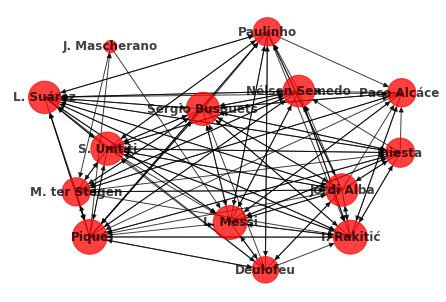

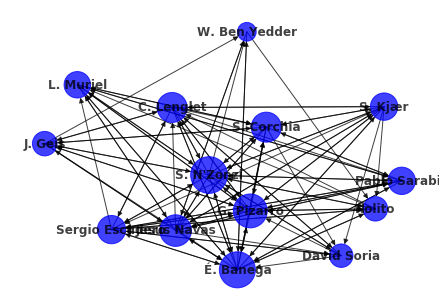

In [68]:
plot_passing_networks(G1,G2)